# 02582 Computational Data Analysis - Case 1

**Group members**:
- Raquel Moleiro Marques: s243636
- Sree Keerthi Desu: s243933

______

### Imports needed

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

from scipy.stats import skewtest
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, KFold

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

__________

## Load datasets

In [44]:
# Load the training data
case1_data_path = "case1Data.csv"
df = pd.read_csv(case1_data_path)
df

,y,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,...,x_91,x_92,x_93,x_94,x_95,C_01,C_02,C_03,C_04,C_05
0,375.823073,6.359019,-13.367120,-2.483750,-6.641891,11.733539,NaN,-17.085361,22.194764,16.827888,...,-10.200888,3.980048,-4.433274,-1.473723,NaN,74.0,72.0,72.0,73.0,73.0
1,266.811730,3.873664,-8.470389,-3.055012,NaN,11.420983,1.822330,-13.694100,22.738654,20.307503,...,-9.740207,NaN,-2.629314,4.816987,-12.240248,74.0,72.0,72.0,73.0,73.0
2,267.271759,5.275824,-12.070531,-1.366168,-4.819100,10.721527,-5.125992,-17.476865,NaN,15.963889,...,-14.501970,10.054005,NaN,NaN,-11.107921,73.0,72.0,75.0,74.0,74.0
3,219.951294,4.430110,-4.467975,-0.730736,-10.047104,11.498539,-2.870260,-14.033012,18.225190,10.409488,...,-11.086963,2.019726,-8.531959,3.520833,NaN,71.0,72.0,73.0,71.0,72.0
4,289.697954,3.116458,-8.518713,-6.796050,NaN,7.646285,-3.118309,-13.102567,22.801217,16.680208,...,-9.117422,6.627601,-2.805531,5.914351,-11.240573,72.0,72.0,72.0,74.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,179.496446,0.068763,-13.641936,-10.840247,-7.940555,6.429727,-9.573881,-14.778257,21.290921,8.128314,...,-14.104077,1.859479,-9.569323,3.104148,-15.442839,74.0,72.0,73.0,72.0,73.0
96,161.037072,1.491110,-14.347095,NaN,-8.246338,10.170677,NaN,-16.003159,23.579735,12.688034,...,-19.050006,3.847112,-6.446968,0.281087,-14.840473,72.0,72.0,73.0,71.0,73.0
97,140.437828,-3.965484,-9.453867,-9.903336,-10.641552,8.570113,NaN,-11.488808,18.958736,10.115323,...,-19.259988,NaN,-8.666655,2.843539,NaN,74.0,72.0,73.0,74.0,73.0
98,202.443713,0.709377,-9.807318,-6.803646,-4.259225,11.406617,-1.232783,-10.300590,21.074819,12.448371,...,-17.866896,NaN,-6.440458,4.119420,-10.105708,75.0,72.0,74.0,72.0,73.0


In [45]:
# Splitting response and predictors from each other
X, y = df.drop(['y'],axis=1), df['y']

In [46]:
# Load test data
xnew_data_path = "case1Data_Xnew.csv"
X_test = pd.read_csv(xnew_data_path)
X_test

,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,x_10,...,x_91,x_92,x_93,x_94,x_95,C_01,C_02,C_03,C_04,C_05
0,-0.843969,-9.104918,-5.076919,-4.222152,3.606609,-4.505494,-11.481997,16.201722,15.939470,NaN,...,-13.884702,7.465161,-4.667464,3.949705,-10.715577,73.0,72.0,73.0,75.0,73.0
1,0.802093,-10.196678,-4.500370,-7.827837,5.199002,NaN,-15.928708,20.151309,13.707194,-8.517576,...,-14.937164,5.229448,-6.927970,3.271193,-12.420893,73.0,72.0,73.0,71.0,75.0
2,4.234883,-10.798261,-0.465914,-6.054850,NaN,NaN,-16.182312,16.419564,12.152861,-6.418069,...,-11.058964,4.692879,-0.929818,NaN,-14.551448,NaN,72.0,73.0,71.0,73.0
3,7.041336,-5.169413,-4.158334,-4.270638,14.939894,0.008338,-10.556799,NaN,14.180830,NaN,...,NaN,7.460901,-2.484389,8.149697,-11.598544,72.0,72.0,74.0,75.0,75.0
4,1.135564,-12.048088,-4.828939,-6.565217,7.493100,-2.789944,-15.859234,21.560086,14.147759,-4.848519,...,-9.607803,5.654679,-3.020357,3.030958,-13.320599,72.0,72.0,71.0,74.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,-10.333885,-4.882893,-5.001330,14.740750,-7.375751,-14.269895,NaN,18.944182,-3.516163,...,-15.231878,NaN,NaN,2.773400,-8.033125,73.0,72.0,71.0,74.0,NaN
996,-0.301550,-9.275305,NaN,-9.984508,5.443650,-5.003200,-13.199856,22.410145,12.723149,-5.684371,...,-13.423383,4.090021,-5.349963,3.544913,-10.234976,72.0,72.0,73.0,74.0,NaN
997,3.671630,-6.533390,-0.489830,-5.143861,13.761843,-8.637093,NaN,24.973347,13.576836,-3.389953,...,-10.147875,8.668706,-4.411021,-0.860737,-7.109857,72.0,72.0,71.0,75.0,NaN
998,2.356294,-4.169392,-2.274090,-2.484517,10.591025,2.055309,-9.804748,15.946822,11.053100,-3.986907,...,-11.107330,4.475155,-2.621623,8.438770,-7.255016,72.0,72.0,71.0,71.0,73.0


________

## Data exploration

In [47]:
# Print missing values for each X column
columns_with_missing_values = X.columns[X.isnull().any()]
X_missing_values = X[columns_with_missing_values].isnull().sum()

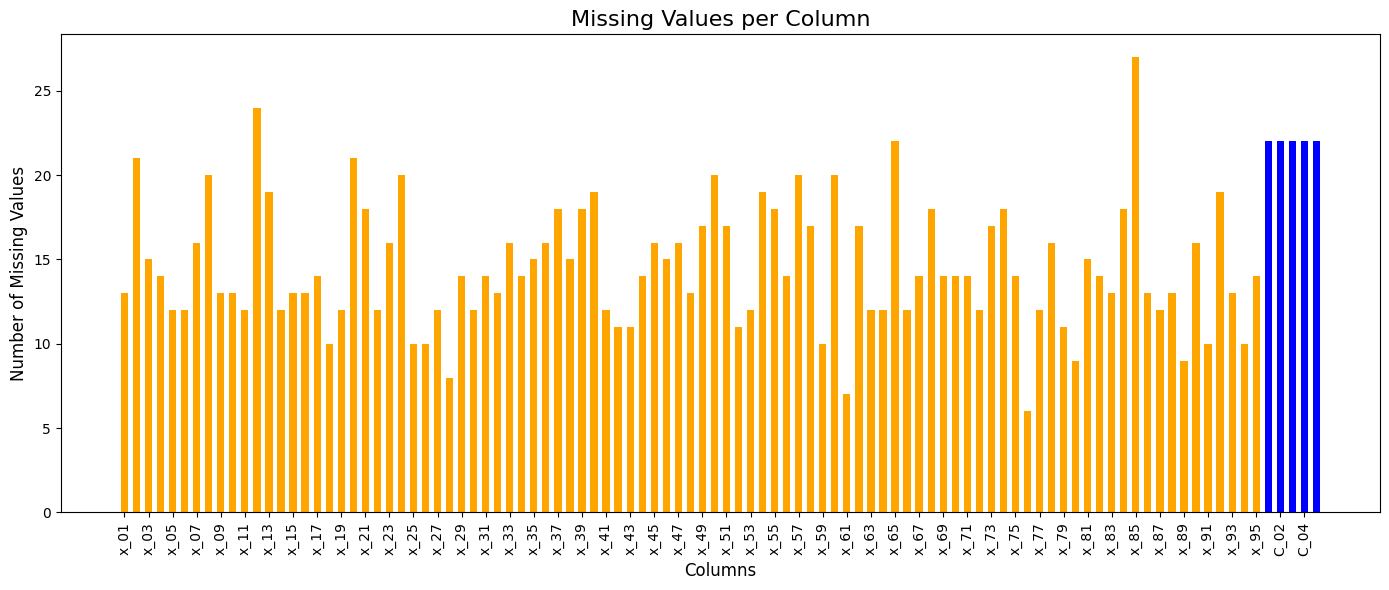

In [48]:
# Create a plot to visualize the missing values
plt.figure(figsize=(14, 6))

# Set the colors: one for columns starting with 'x' and another for columns starting with 'C'
colors = ['orange' if col.startswith('x') else 'blue' for col in X_missing_values.index]

# Adjusting the width of the bars to add more space between each column
bar_width = 0.6
plt.bar(X_missing_values.index, X_missing_values.values, color=colors, width=bar_width)

# Title and labels
plt.title('Missing Values per Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)

# Rotate the x-axis labels and set a readable font size
plt.xticks(rotation=90, fontsize=10)

# Set the x-ticks to show every 2nd label
plt.xticks(ticks=range(0, len(X_missing_values), 2), labels=X_missing_values.index[::2], fontsize=10)

plt.tight_layout()
plt.show()

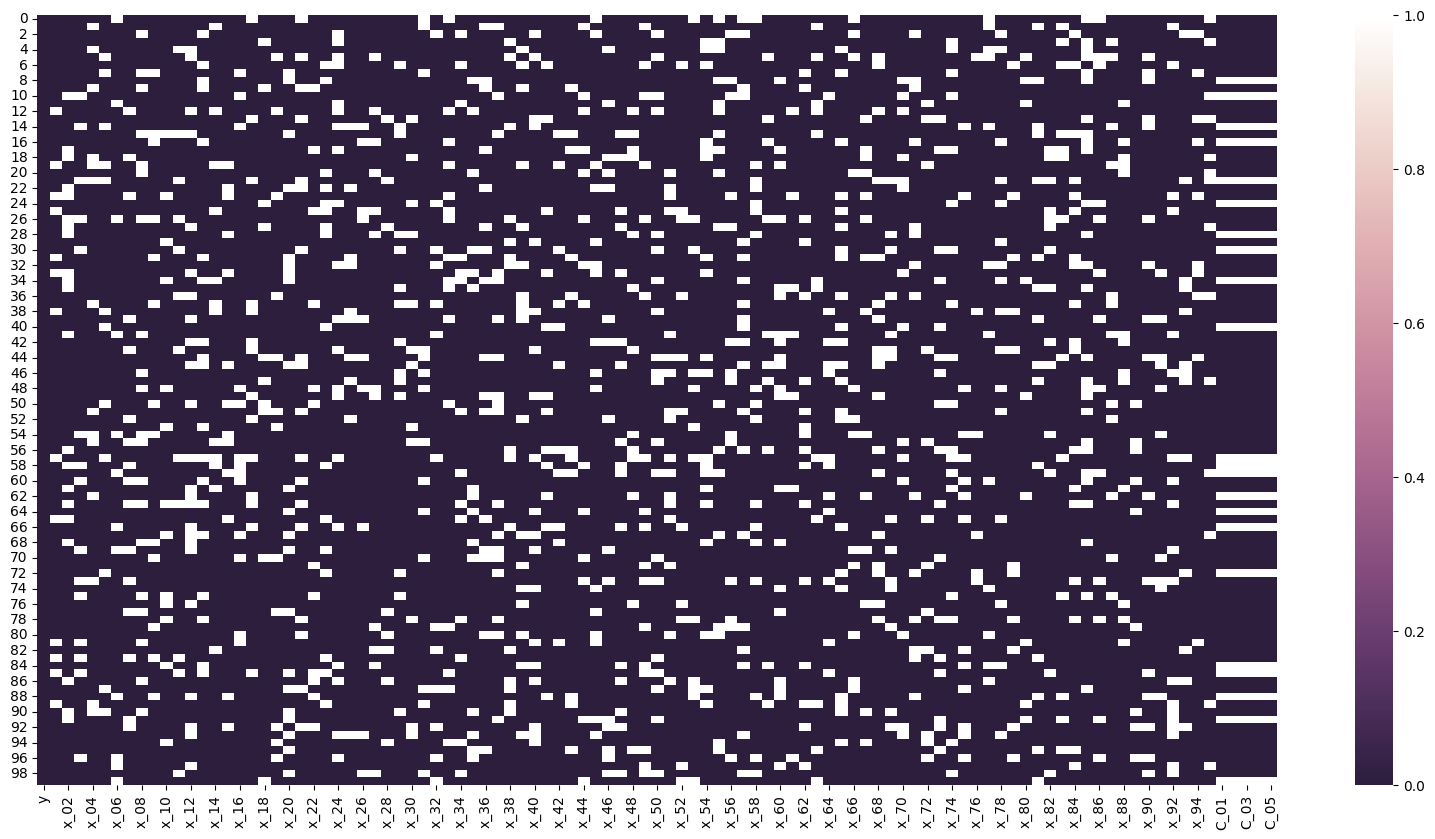

In [49]:
plt.figure(figsize=(20, 10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap);

________

## Preprocessing

In [50]:
# Extract columns starting with 'X' for numerical data
numerical_features = [col for col in X.columns if col.startswith('x')]
# Extract columns starting with 'C' for categorical data
categorical_features = [col for col in X.columns if col.startswith('C')]

# Split training data into numerical and categorical data
numerical_X_data = X[numerical_features]
categorical_X_data = X[categorical_features]

# Split test data into numerical and categorical data
numerical_X_test = X_test[numerical_features]
categorical_X_test = X_test[categorical_features]

In [51]:
# Scipy skewtest function to test for skewness of individual distributions
# H_0: distribution is drawn from a normal distribution
# If the p-value is less than 0.05, we reject H_0 => distribution is skewed and we impute with Median, else Mean

impute_dict = {col: 'Median' if skewtest(numerical_X_data[col], nan_policy='omit').pvalue < 0.05 else 'Mean' for col in numerical_X_data.columns}

# Use the dictionary to split data based on imputation strategy
numerical_features_mean = [col for col in numerical_X_data.columns if impute_dict[col] == 'Mean']
numerical_features_median = [col for col in numerical_X_data.columns if impute_dict[col] == 'Median']

In [52]:
# Define the preprocessor for numeric variables to be imputed with the MEAN and scaled
numeric_mean_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

# Define the preprocessor for numeric variables to be imputed with the MEDIAN and scaled
numeric_median_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Define the preprocessor for categorical variables to be imputed with a constant value and one-hot encoded
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(missing_values=pd.NA, strategy="constant", fill_value=0)), ("encoder", OneHotEncoder())
        ]
)

# Define the preprocessor to be used on the data
preprocessor = ColumnTransformer(
    transformers=[
        ("num_mean", numeric_mean_transformer, numerical_features_mean),
        ("num_median", numeric_median_transformer, numerical_features_median),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [53]:
# Fit the preprocessor on the training data
fitted_preprocessor = preprocessor.fit(X)

In [54]:
# Transform the training and test data
X_preprocessed = fitted_preprocessor.transform(X)
X_test_preprocessed = fitted_preprocessor.transform(X_test)

___________

## Model selection

In [13]:
def five_fold_cv(X, y, n_folds=5):
  
    ### Cross-validation
    outerCV = model_selection.KFold(n_splits=n_folds, shuffle=True)

    # Keep track of results per model
    results = {}

    # Outer CV to find best model
    for fold, indices in enumerate(outerCV.split(X, y)):

        print(f"For fold {fold+1}:")

        # Get indices from split
        train_idx = indices[0]
        test_idx = indices[1]
        
        # Extract training and test data for current fold
        X_train, X_test = X[train_idx, :], X[test_idx, :]
        y_train, y_test = y.loc[train_idx], y.loc[test_idx]

        # Inner CV to find best hyperparameters
        innerCV = model_selection.KFold(n_splits=n_folds, shuffle=True)
        
        # Define models
        LR_model = LinearRegression()
        Lasso_model = Lasso()
        Ridge_model = Ridge()
        ElasticNet_model = ElasticNet()
        MLP_model = MLPRegressor()
        RF_model = RandomForestRegressor()
        SVR_model = SVR()

        # Define search space for hyperparameters
        LR_grid = {'positive': [True, False]}
        Lasso_grid = {'alpha': [1, 5, 10, 20]} 
        Ridge_grid = {'alpha': [1, 5, 10, 20]}
        ElasticNet_grid = {'alpha': [1, 5, 10, 20], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
        MLP_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1], 'hidden_layer_sizes': [(20, ), (100, ), (50, 20), (50, 20, 10)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "learning_rate_init": [0.0005, 0.001, 0.01, 0.1]} 
        RF_grid = {'max_depth': [10, 20, 40, 60, 80, 90, 100, None],
                     'min_samples_leaf': [1, 2, 4],
                     'min_samples_split': [2, 5, 10],
                     'n_estimators': [50, 100, 200, 400, 600]}
        SVR_grid =  {'kernel': ('linear', 'rbf','poly'), 
                                  'C':[1.5, 10],
                                  'gamma': [1e-7, 1e-4],
                                  'epsilon':[0.1,0.2,0.5,0.3]}

        # GridSearchCV to find best hyperparameters within each model
        LR_search = model_selection.GridSearchCV(estimator=LR_model, param_grid=LR_grid, scoring='neg_root_mean_squared_error', cv=innerCV)
        Lasso_search = model_selection.GridSearchCV(estimator=Lasso_model, param_grid=Lasso_grid, scoring='neg_root_mean_squared_error', cv=innerCV)
        Ridge_search = model_selection.GridSearchCV(estimator=Ridge_model, param_grid=Ridge_grid, scoring='neg_root_mean_squared_error', cv=innerCV)
        ElasticNet_search = model_selection.GridSearchCV(estimator=ElasticNet_model, param_grid=ElasticNet_grid, scoring='neg_root_mean_squared_error', cv=innerCV)
        MLP_search = model_selection.GridSearchCV(estimator=MLP_model, param_grid=MLP_grid, scoring='neg_root_mean_squared_error', cv=innerCV)
        RF_search = model_selection.GridSearchCV(estimator=RF_model, param_grid=RF_grid, scoring='neg_root_mean_squared_error', cv=innerCV)
        SVR_search = model_selection.GridSearchCV(estimator=SVR_model, param_grid=SVR_grid, scoring='neg_root_mean_squared_error', cv=innerCV)
        
        # Perform search
        LR_results = LR_search.fit(X_train, y_train)
        Lasso_results = Lasso_search.fit(X_train, y_train)
        Ridge_results = Ridge_search.fit(X_train, y_train)
        ElasticNet_results = ElasticNet_search.fit(X_train, y_train)
        MLP_results = MLP_search.fit(X_train, y_train)
        RF_results = RF_search.fit(X_train, y_train)
        SVR_results = SVR_search.fit(X_train, y_train)

        # Get best performing model (returns the model that is automatically refitted on all data in current outer fold using best hyperparameters found from inner CV)
        LR_best_model = LR_results.best_estimator_
        Lasso_best_model = Lasso_results.best_estimator_
        Ridge_best_model = Ridge_results.best_estimator_
        ElasticNet_best_model = ElasticNet_results.best_estimator_
        MLP_best_model = MLP_results.best_estimator_
        RF_best_model = RF_results.best_estimator_
        SVR_best_model = SVR_results.best_estimator_

        # Make predictions on test set
        LR_y_preds = LR_best_model.predict(X_test)
        Lasso_y_preds = Lasso_best_model.predict(X_test)
        Ridge_y_preds = Ridge_best_model.predict(X_test)
        ElasticNet_y_preds = ElasticNet_best_model.predict(X_test)
        MLP_y_preds = MLP_best_model.predict(X_test)
        RF_y_preds = RF_best_model.predict(X_test)
        SVR_y_preds = SVR_best_model.predict(X_test)

        # Evaluate predictions
        LR_rmse = root_mean_squared_error(y_test.values, LR_y_preds)
        Lasso_rmse = root_mean_squared_error(y_test.values, Lasso_y_preds)
        Ridge_rmse = root_mean_squared_error(y_test.values, Ridge_y_preds)
        ElasticNet_rmse = root_mean_squared_error(y_test.values, ElasticNet_y_preds)
        MLP_rmse = root_mean_squared_error(y_test.values, MLP_y_preds)
        RF_rmse = root_mean_squared_error(y_test.values, RF_y_preds)
        SVR_rmse = root_mean_squared_error(y_test.values, SVR_y_preds)

        # Save results and corresponding best params per cv fold to calculate EPE
        results[str(fold)] = {'LR': {'RMSE': LR_rmse, 'params': LR_results.best_params_}, 
                        'Lasso': {'RMSE': Lasso_rmse, 'params': Lasso_results.best_params_}, 
                        'Ridge': {'RMSE': Ridge_rmse, 'params': Ridge_results.best_params_}, 
                        'ElasticNet': {'RMSE': ElasticNet_rmse, 'params': ElasticNet_results.best_params_},
                        'MLP': {'RMSE': MLP_rmse, 'params': MLP_results.best_params_}, 
                        'RF': {'RMSE': RF_rmse, 'params': RF_results.best_params_}, 
                        'SVR': {'RMSE': SVR_rmse, 'params': SVR_results.best_params_}
                        }

        # Report progress
        print('> LR RMSE=%.3f, cfg=%s' % (LR_rmse, LR_results.best_params_))
        print('> Lasso RMSE=%.3f, cfg=%s' % (Lasso_rmse, Lasso_results.best_params_))
        print('> Ridge RMSE=%.3f, cfg=%s' % (Ridge_rmse, Ridge_results.best_params_))
        print('> ElasticNet RMSE=%.3f, cfg=%s' % (ElasticNet_rmse, ElasticNet_results.best_params_))
        print('> MLP RMSE=%.3f, cfg=%s' % (MLP_rmse, MLP_results.best_params_))
        print('> RF RMSE=%.3f, cfg=%s' % (RF_rmse, RF_results.best_params_))
        print('> SVR RMSE=%.3f, cfg=%s \n' % (SVR_rmse, SVR_results.best_params_))

        print('- '*60+'\n')
    
    return results

##### Evaluate results

In [14]:
def evaluate_cv_results(results):
    # Get only the RMSE errors made by each model
    model_errors = {}
    for fold in results.keys():
        for model, values in results[fold].items():
            if model not in model_errors:
                model_errors[model] = [values['RMSE']]
            else:
                model_errors[model].append(values['RMSE'])
    
    # Get expected prediction error for each model
    EPE = {model: float(np.mean(values)) for model, values in model_errors.items()}
    print(f'EPE values of all models: {EPE}\n')

    # Choose the best model as the one with the lowest EPE
    best_model = min(EPE, key=EPE.get)
    print(f"Best model: {best_model} with EPE: {EPE[best_model]}\n")

    # Get the best hyperparameters for the best model
    best_hyperparameters = {'RMSE': np.inf, 'params': {}}
    for fold in results.keys():
        for model, values in results[fold].items():
            if model == best_model:
                if values['RMSE'] < best_hyperparameters['RMSE']:
                    best_hyperparameters['RMSE'] = round(float(values['RMSE']), 3)
                    best_hyperparameters['params'] = values['params']

    print(f'Best hyperparameters for best model: {best_hyperparameters}')

### Without PCA

In [15]:
results = five_fold_cv(X_preprocessed, y)

For fold 1:
> LR RMSE=45.498, cfg={'positive': False}
> Lasso RMSE=29.876, cfg={'alpha': 1}
> Ridge RMSE=37.218, cfg={'alpha': 5}
> ElasticNet RMSE=38.149, cfg={'alpha': 1, 'l1_ratio': 0.9}
> MLP RMSE=39.362, cfg={'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
> RF RMSE=46.813, cfg={'max_depth': 80, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
> SVR RMSE=41.398, cfg={'C': 1.5, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'} 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

For fold 2:
> LR RMSE=36.799, cfg={'positive': False}
> Lasso RMSE=38.947, cfg={'alpha': 1}
> Ridge RMSE=33.009, cfg={'alpha': 5}
> ElasticNet RMSE=37.679, cfg={'alpha': 1, 'l1_ratio': 0.9}
> MLP RMSE=55.243, cfg={'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.1, 'solver': 'lbfgs'}
> RF RMSE=54.750, c

In [16]:
evaluate_cv_results(results)

EPE values of all models: {'LR': 39.62064985586629, 'Lasso': 34.313341172668906, 'Ridge': 35.412262489844714, 'ElasticNet': 36.18717352671151, 'MLP': 42.4223011515995, 'RF': 47.322355256818454, 'SVR': 37.76566190776889}

Best model: Lasso with EPE: 34.313341172668906

Best hyperparameters for best model: {'RMSE': 29.177, 'params': {'alpha': 1}}


### With PCA

In [17]:
# Perform PCA
pca = PCA(n_components=0.90, svd_solver='full')
X_preprocessed_pca = pca.fit_transform(X_preprocessed) # Transform the training data
X_test_preprocessed_pca = pca.transform(X_test_preprocessed) # Transform the test data

In [18]:
results_pca = five_fold_cv(X_preprocessed_pca, y)

For fold 1:
> LR RMSE=36.721, cfg={'positive': False}
> Lasso RMSE=48.511, cfg={'alpha': 5}
> Ridge RMSE=39.322, cfg={'alpha': 20}
> ElasticNet RMSE=41.714, cfg={'alpha': 1, 'l1_ratio': 0.7}
> MLP RMSE=45.032, cfg={'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0005, 'solver': 'sgd'}
> RF RMSE=64.856, cfg={'max_depth': 90, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
> SVR RMSE=35.079, cfg={'C': 1.5, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'} 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

For fold 2:
> LR RMSE=42.886, cfg={'positive': False}
> Lasso RMSE=36.327, cfg={'alpha': 1}
> Ridge RMSE=33.324, cfg={'alpha': 20}
> ElasticNet RMSE=33.393, cfg={'alpha': 1, 'l1_ratio': 0.9}
> MLP RMSE=41.536, cfg={'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
> RF RMSE=52.

In [19]:
evaluate_cv_results(results_pca)

EPE values of all models: {'LR': 44.47684945025503, 'Lasso': 44.06015038711348, 'Ridge': 42.26605820814626, 'ElasticNet': 41.92452763598545, 'MLP': 48.439725174845194, 'RF': 68.66042514192381, 'SVR': 45.10949251049012}

Best model: ElasticNet with EPE: 41.92452763598545

Best hyperparameters for best model: {'RMSE': 33.393, 'params': {'alpha': 1, 'l1_ratio': 0.9}}


## Model Training

In [55]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [56]:
# Train best model with best hyperparameters on 0.8 of the training data
best_model = Lasso(alpha=1.0)
best_model.fit(X_train, y_train)
y_preds = best_model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_preds)
print(f"RMSE: {rmse}")

pd.DataFrame([rmse], columns=["RMSE"]).to_csv('estimatedRMSE_s243636s243933.csv', index=False)

RMSE: 35.66611099307965


## Predictions

In [57]:
# Train the best model on all training data
final_best_model = Lasso(alpha=1.0)
final_best_model.fit(X_preprocessed, y)

Lasso()

In [58]:
# Predictions on X_test
y_test_preds = final_best_model.predict(X_test_preprocessed)  # Make predictions

# Save predictions to csv
predictions_df = pd.DataFrame(y_test_preds, columns=['Predictions'])
predictions_df.to_csv('predictions_s243636s243933.csv', index=False)
print(predictions_df)

     Predictions
0     174.696271
1     270.894999
2     267.080778
3     206.582732
4     128.798131
..           ...
995   235.301384
996   156.288139
997   129.943531
998   258.921679
999   325.969937

[1000 rows x 1 columns]
